# Data Exploration
In this section we explore the data set using various visualization to have better understanding about how different variables are distributed in the data set and how they are inter related with each other. We have three sections
1. Basic Exploration of dataset
2. Univariate Analysis - considering each variable of the dataset at a time and see how that variable is distributed
3. Bivariate Alaysis- How a particular variable is related to the output variable

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Basic Data Exploration
Here, we try to have bird's eyeview about the data set. We examine how many rows and columns of data we have. To look at some sample of data and find out if there any missing values.

In [2]:
reddit_data = pd.read_csv("data/train_data/reddit_posts.csv")

In [3]:
reddit_data.columns

Index(['Unnamed: 0', 'text', 'labels', 'annotators', 'depth'], dtype='object')

In [4]:
reddit_data.shape

(114942, 5)

In [5]:
reddit_data.sample(n=50)

,Unnamed: 0,text,labels,annotators,depth
7179,7179,do you not believe in the drake equation? what...,question;question;question,4400a37586eae74b5d254c81cd70e4a9;324ca513dc5b3...,2
17472,17472,Can you link some organisations who will do fi...,question;question;question,1b6842f6994d0e1dd00c2b611793d268;4400a37586eae...,3
18424,18424,Okay guys. I'm one of *those* fans that has bo...,question;question,5d63b12e3a79e9d874e585dd1887b8d9;e9e4b3ab35513...,0
94866,94866,Because towels also absorb hate through your s...,answer;humor;answer,38d643ea0762278cc21958fa2363041d;7447fd66d2d83...,1
57752,57752,[Highlights | English | 10:44 | 720p](http://w...,announcement;announcement;announcement,d5b31a90453980e00563f529fc590228;38d643ea07622...,0
54572,54572,~~So it seems like a splitter bus moves indivi...,answer;other;disagreement,d08f754eceb1c6b25096086067123c3e;38d643ea07622...,1
60702,60702,"Nah, fuck people who won't stop talking about ...",elaboration;negativereaction;negativereaction,d3ff34d503cec21ac13d39d7440d5490;e1474365f1214...,2
110969,110969,I don't know of anything more appropriate for ...,other;answer;answer,d5b31a90453980e00563f529fc590228;38d643ea07622...,3
44040,44040,Ireland is at -89 gpt. That is a financial pro...,elaboration;disagreement;other,313010445cba4a591e2368269a150e9f;69fd9a3dad7cb...,3
108835,108835,youd still have to count every player in chat ...,elaboration;elaboration;elaboration,e9e4b3ab355135fa954badcc06bfccc6;fd6076bf35743...,6


The unnamed column is just row index and does not add much value to further analysis. Also we can see that there are posts which have same labels and some which have different labels. We will discuss in further section how we handle this problem.

In [6]:
reddit_data.isna().sum()

Unnamed: 0       0
text          1274
labels           0
annotators       0
depth            0
dtype: int64

There are 1274 missing values for text column. It is impossible to impute values for text columns and hence we will delete these rows.

In [7]:
reddit_data.dropna(subset=['text'], inplace=True)

__Observations__
1. We have around 100000 thousand rows of data with 4 columns (unnamed column is not useful)
2. There are 1274 missing rows for text column. As text column is the most important variable for classification, we delete those rows.
3. We have posts which either have the same label by all annotators while some have different annotations.

## Univariate analysis
In this section we consider only one variable at a time and build some visualizations and lokk at summary for that variable. We do this for:
- label
- text
- depth

We need to build model which can classify the posts to it's respective classes. This classification needs to be independent of the annotator is for the post we used in training. Because in future, it is possible that those annotators are not there and we have different people annotating the posts. So our model needs to be independent  of the annotator. Hence, we do not consider annotator column as variable to include in model training. 

### label

We look at how many annotations or label each column has 

In [8]:
# count of labels for each posts
reddit_data['no_annotations'] = reddit_data['labels'].apply(lambda x :len(x.split(";")))

In [9]:
reddit_data['no_annotations'].value_counts()

3    106361
2      6093
1      1214
Name: no_annotations, dtype: int64

Most of the labels have 3 annotations. The post could be either be annotated the same label by all annotators or they will have different annotations. We now look at the count of unique labels each post has

In [10]:
# count of unique labels
reddit_data['no_unique_annotations'] = reddit_data['labels'].apply(lambda x :len(set(x.split(";"))))

In [11]:
reddit_data['no_unique_annotations'].value_counts()

1    64622
2    39400
3     9646
Name: no_unique_annotations, dtype: int64

__Unique Label__

We could see most of the posts have unique labels. However around 40% of posts have multiple annotations. One way is to build a model to predict which annotator would label each post. However, in future the annotators would be different and this approach would fail. So we need model which is agnostic to who the annotator is. So we need to get unique label for posts which have mulitple labels. I decided to use this strategy:
1. In case of multiple labels, the post is assigned label which is given by the most of the annotators. For e.g. incase we have annotations {question, question, appreciation}, we assign the post "question" label as 2 out of 3 annotators have chosen that annoation.
2. In case of tie, the post is assigned label which is given by the most experienced of the annotators. for e.g. if we have post labels as {"appreciation", "announcement"} and if the annotator who assigned "appreciation" has annotated more posts than the annotator who assigned "announcement" label, post is labelled as "appreciation" and vice versa.

In [12]:
# creating a dicitionary with annotators as key and the number posts they have annotated as repsective values
annotators_count = {}
for row in reddit_data.itertuples(index=False):
    for annotator in row.annotators.split(";"):
        if annotator in annotators_count:
            annotators_count[annotator] += 1
        else:
            annotators_count[annotator] = 1

In [13]:
list(annotators_count.keys())

['fc96a15ab87f02dd1998ff55a64f6478',
 'e9e4b3ab355135fa954badcc06bfccc6',
 '31ac59c1734c1547d4d0723ff254c247',
 'd0bf500c45ae7c1c08eb65ef0a4e48f9',
 '29a90e15afc16faf25337162301c0328',
 'fd6076bf357438af2eab3af408e80dd9',
 'd3ff34d503cec21ac13d39d7440d5490',
 '9c89a75e42cad794ca168024b87b02c7',
 '313010445cba4a591e2368269a150e9f',
 '5d63b12e3a79e9d874e585dd1887b8d9',
 '4400a37586eae74b5d254c81cd70e4a9',
 '69fd9a3dad7cb11de711db4e9e0507bf',
 '887a4849ca16b52391353d094ca5aae2',
 '0c535342ca35d83ec8f025a060dd5ac6',
 '7447fd66d2d83d6577bce5cb0183b9ec',
 '38d643ea0762278cc21958fa2363041d',
 'd08f754eceb1c6b25096086067123c3e',
 'f8484f2bc9b23a4f9dc9f441a85d5747',
 '440ce79c0e6e377d44b1f9c585154a1f',
 '1b6842f6994d0e1dd00c2b611793d268',
 '324ca513dc5b339588057f321278791d',
 '84d17254e707caa405b61fa2ba5ff02f',
 'a7fed70cba60eca27950350c2173aaee',
 '343090f214e68ce7f8a0c4111d6022ec',
 'b2c904864465a6c1b286b21ac4092c5d',
 'e1474365f12144c30dbe712de11e0aca',
 '1791ac7859c3d5c7dd47b4eecada6cf1',
 

In [14]:
len(list(annotators_count.keys()))

37

In [15]:
# function to get label from set of label
def get_unique_label(data, label_col, annotator_col, count_dict):
    unique_label_list = []
    for row in data.itertuples(index=False):
        if len(set(row[data.columns.get_loc(label_col)].split(";"))) == 1:
            unique_label = row[data.columns.get_loc(label_col)].split(";")[0]
        elif len(set(row[data.columns.get_loc(label_col)].split(";"))) == len(row[data.columns.get_loc(label_col)].split(";")):
            unique_label = row[data.columns.get_loc(label_col)].split(";")[0]
            annotator = row[data.columns.get_loc(annotator_col)].split(";")[0]
            for i in range(1,len(row[data.columns.get_loc(annotator_col)].split(";"))):
                if count_dict[row[data.columns.get_loc(annotator_col)].split(";")[i]] > count_dict[annotator]:
                    unique_label = row[data.columns.get_loc(label_col)].split(";")[i]
                    annotator = row[data.columns.get_loc(annotator_col)].split(";")[i]
        else:
            count_label = {label:0 for label in set(row[data.columns.get_loc(label_col)].split(";"))}
            for label in row[data.columns.get_loc(label_col)].split(";"):
                count_label[label] += 1
            unique_label = sorted(count_label.items(), key=lambda x: x[1], reverse=True)[0][0]
        unique_label_list.append(unique_label)
    return unique_label_list

In [16]:
reddit_data['final_label'] = get_unique_label(reddit_data, "labels", "annotators", annotators_count)
reddit_data['final_label'].value_counts()

answer              42242
elaboration         22268
question            17669
appreciation        10592
agreement            5723
disagreement         4186
humor                3579
other                3157
negativereaction     2702
announcement         1550
Name: final_label, dtype: int64

__Observation__

We see that most of the posts have label "answer" and followed by elaboration. There is clear class imbalance: thescond most frequent class elaboration is almost as half as "answer". 

### text
Text is the most important feature to decide the post label. We first lower all the string in the column.
We look at following things:
1. How many words and characters are there in each post. This information is very important in deciding the modelling approach. If the majority of the posts are very large, traditional machine learning approach might not be very accurate and we might need to use deep learning methods 
2. Presence of certain special characters across different labels
3. Unigram Word distribution across different labels

In [17]:
reddit_data['text'] = reddit_data['text'].str.lower()

In [18]:
reddit_data['len_words'] = reddit_data['text'].apply(lambda x:len(x.lower().split(" ")))

In [19]:
reddit_data['len_words'].describe()

count    113668.000000
mean         44.504645
std          77.315966
min           1.000000
25%          10.000000
50%          23.000000
75%          50.000000
max        3336.000000
Name: len_words, dtype: float64

In [20]:
reddit_data['len_char'] = reddit_data['text'].apply(lambda x:sum([len(word) for word in x.lower().split(" ")]))

In [21]:
reddit_data['len_char'].describe()

count    113668.000000
mean        206.895573
std         371.918930
min           0.000000
25%          46.000000
50%         104.000000
75%         227.000000
max       19101.000000
Name: len_char, dtype: float64

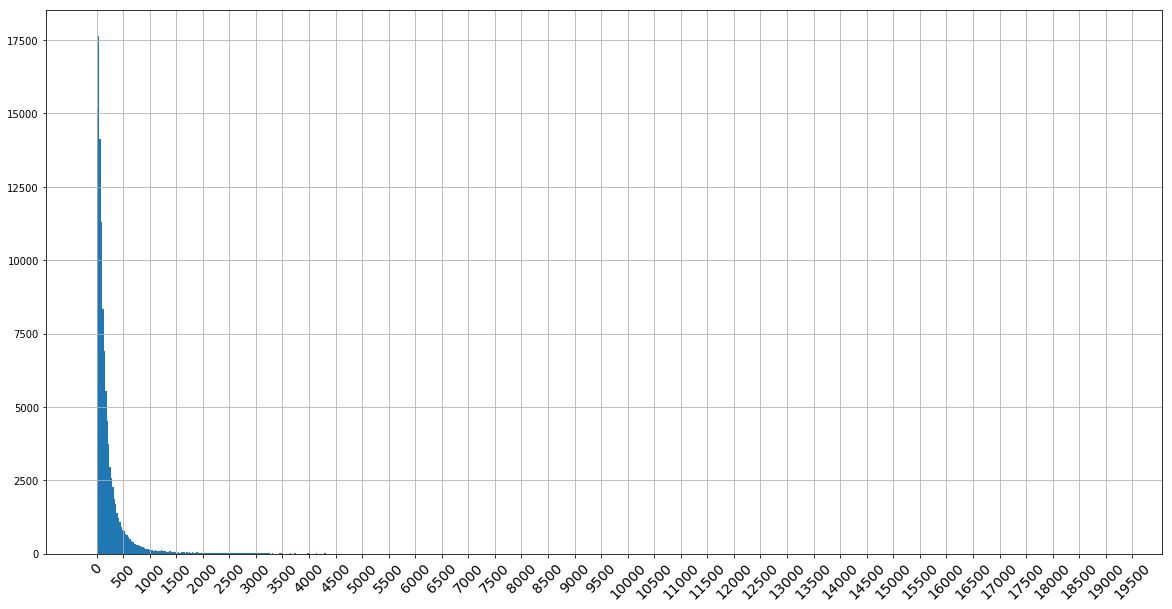

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
reddit_data['len_char'].hist(bins='scott')
ax.set_xticks(list(range(0,20000,500)))
ax.tick_params(axis="x", labelsize=14, rotation=45)
plt.show()

In [23]:
reddit_data['len_char'].quantile([0.1, 0.3,0.5,0.75,0.9,0.95, 0.99, 1.0])

0.10       21.0
0.30       56.0
0.50      104.0
0.75      227.0
0.90      457.0
0.95      700.0
0.99     1666.0
1.00    19101.0
Name: len_char, dtype: float64

In [24]:
reddit_data[reddit_data['len_char'] <= 10]

,Unnamed: 0,text,labels,annotators,depth,no_annotations,no_unique_annotations,final_label,len_words,len_char
63,63,no,answer;answer;answer,fc96a15ab87f02dd1998ff55a64f6478;887a4849ca16b...,1,3,1,answer,1,2
90,90,nice name,appreciation;appreciation;other,e9e4b3ab355135fa954badcc06bfccc6;38d643ea07622...,1,3,2,appreciation,2,8
91,91,thx,appreciation;appreciation;appreciation,e9e4b3ab355135fa954badcc06bfccc6;38d643ea07622...,2,3,1,appreciation,1,3
96,96,2147m,answer;answer;answer,e9e4b3ab355135fa954badcc06bfccc6;38d643ea07622...,2,3,1,answer,1,5
100,100,1:17 lol,announcement;announcement;announcement,887a4849ca16b52391353d094ca5aae2;4400a37586eae...,0,3,1,announcement,2,7
...,...,...,...,...,...,...,...,...,...,...
114906,114906,you can,agreement;other;elaboration,e9e4b3ab355135fa954badcc06bfccc6;324ca513dc5b3...,6,3,3,agreement,3,6
114907,114907,good luck!,appreciation;other;other,e9e4b3ab355135fa954badcc06bfccc6;324ca513dc5b3...,7,3,2,other,2,9
114909,114909,"no, you!",humor;other;disagreement,e9e4b3ab355135fa954badcc06bfccc6;324ca513dc5b3...,9,3,3,humor,2,7
114916,114916,yes,answer;answer;answer,5d63b12e3a79e9d874e585dd1887b8d9;f8484f2bc9b23...,2,3,1,answer,1,3


In [25]:
reddit_data[reddit_data['len_words'] <= 1]

,Unnamed: 0,text,labels,annotators,depth,no_annotations,no_unique_annotations,final_label,len_words,len_char
51,51,chrisarchiers,answer;answer;answer,5d63b12e3a79e9d874e585dd1887b8d9;69fd9a3dad7cb...,1,3,1,answer,1,13
63,63,no,answer;answer;answer,fc96a15ab87f02dd1998ff55a64f6478;887a4849ca16b...,1,3,1,answer,1,2
91,91,thx,appreciation;appreciation;appreciation,e9e4b3ab355135fa954badcc06bfccc6;38d643ea07622...,2,3,1,appreciation,1,3
96,96,2147m,answer;answer;answer,e9e4b3ab355135fa954badcc06bfccc6;38d643ea07622...,2,3,1,answer,1,5
112,112,yes,answer;answer;answer,a7fed70cba60eca27950350c2173aaee;4400a37586eae...,1,3,1,answer,1,3
...,...,...,...,...,...,...,...,...,...,...
114731,114731,[deleted],elaboration;elaboration;disagreement,f8484f2bc9b23a4f9dc9f441a85d5747;5d63b12e3a79e...,2,3,2,elaboration,1,9
114865,114865,bye.,negativereaction;question;negativereaction,887a4849ca16b52391353d094ca5aae2;e9e4b3ab35513...,5,3,2,negativereaction,1,4
114888,114888,http://imgur.com/l5mhsxg,elaboration;other;other,343090f214e68ce7f8a0c4111d6022ec;313010445cba4...,9,3,2,other,1,24
114916,114916,yes,answer;answer;answer,5d63b12e3a79e9d874e585dd1887b8d9;f8484f2bc9b23...,2,3,1,answer,1,3


In [26]:
reddit_data[reddit_data['len_char'] == 0]

,Unnamed: 0,text,labels,annotators,depth,no_annotations,no_unique_annotations,final_label,len_words,len_char
2297,2297,,question;question;question,343090f214e68ce7f8a0c4111d6022ec;440ce79c0e6e3...,0,3,1,question,2,0
4437,4437,,question;question;question,887a4849ca16b52391353d094ca5aae2;f8484f2bc9b23...,0,3,1,question,2,0
30905,30905,,announcement;announcement;announcement,e1474365f12144c30dbe712de11e0aca;1b6842f6994d0...,0,3,1,announcement,2,0
54133,54133,,question;question;question,313010445cba4a591e2368269a150e9f;324ca513dc5b3...,0,3,1,question,2,0


In [27]:
reddit_data = reddit_data[~(reddit_data['text'].isin(['[deleted]'," ", '']))]

__Observations__:

1. Most of the posts are small with most of the posts having less than 50 words and 400 characters.
2. There are certain posts which are deleted or are empty. We will delete these rows

### depth

In [28]:
reddit_data['depth'].value_counts()

1     50565
2     25204
3     14113
0      7996
4      7123
5      3771
6      2035
7      1153
8       639
9       380
10      243
Name: depth, dtype: int64

## Bivariate analysis
Here we will look how the output variable label behaves w.r.t text and depth variables taken individually at a time

### text
In this section we look at how diffrent characters and words are distributed across different post labels.

1. Preseence of special Characters
    1.1. Question mark character: We see that one of the labels is label of question. Intuitively all post with label as question will have more question marks than other labels
    1.2. Number of lines. We observe that many posts had multiple lines we will see if different labels have different number of lines
    1.3. Exclamation marks. Post with labels appreciation should have more exclamation marks than other labels
    2. Unigram Distribution

In [29]:
reddit_data['count_question_marks'] = reddit_data['text'].apply(lambda x:str(x).count("?"))

In [30]:
reddit_data.groupby(['final_label'])['count_question_marks'].median()

final_label
agreement           0
announcement        0
answer              0
appreciation        0
disagreement        0
elaboration         0
humor               0
negativereaction    0
other               0
question            1
Name: count_question_marks, dtype: int64

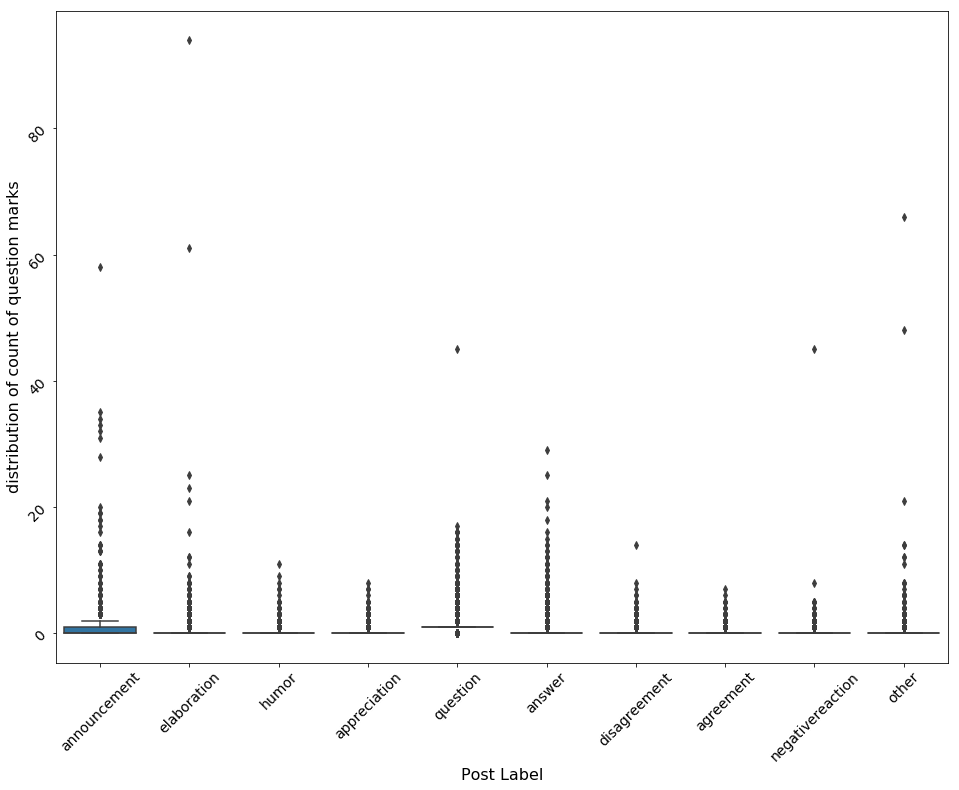

In [31]:
import seaborn as sns
from numpy import median
fig, ax = plt.subplots(figsize=(16,12))
sns.boxplot(x = 'final_label', y = 'count_question_marks', data = reddit_data)
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("distribution of count of question marks", fontsize=16)
ax.tick_params(axis="x", labelsize=14, rotation=45)
ax.tick_params(axis="y", labelsize=14, rotation=45)
plt.show()

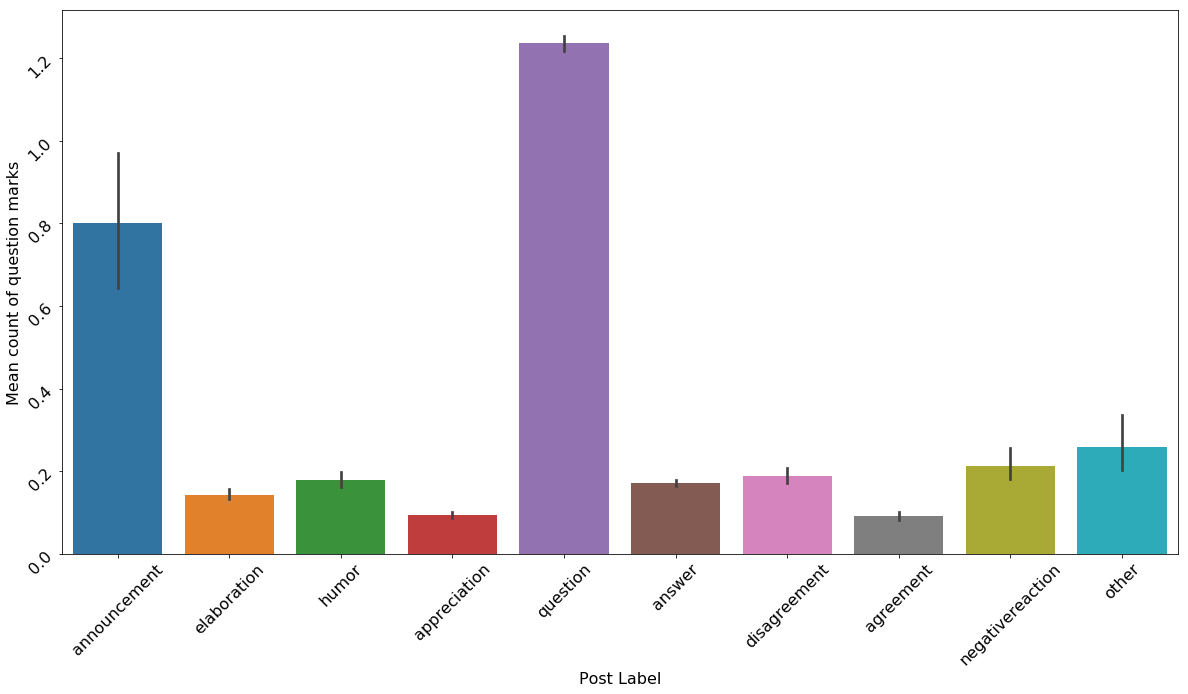

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = 'final_label', y = 'count_question_marks', data = reddit_data)
# plt.yticks([0,2,4,6,8,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("Mean count of question marks", fontsize=16)
ax.tick_params(axis="y", labelsize=16, rotation=45)
ax.tick_params(axis="x", labelsize=16, rotation=45)
plt.show()

We clearly observe that post with questions have higher count "?" label

In [48]:
reddit_data['count_line'] = reddit_data['text'].apply(lambda x:str(x).count("\n"))

In [49]:
reddit_data.groupby(['final_label'])['count_line'].median()

final_label
agreement           0
announcement        4
answer              0
appreciation        0
disagreement        0
elaboration         0
humor               0
negativereaction    0
other               0
question            0
Name: count_line, dtype: int64

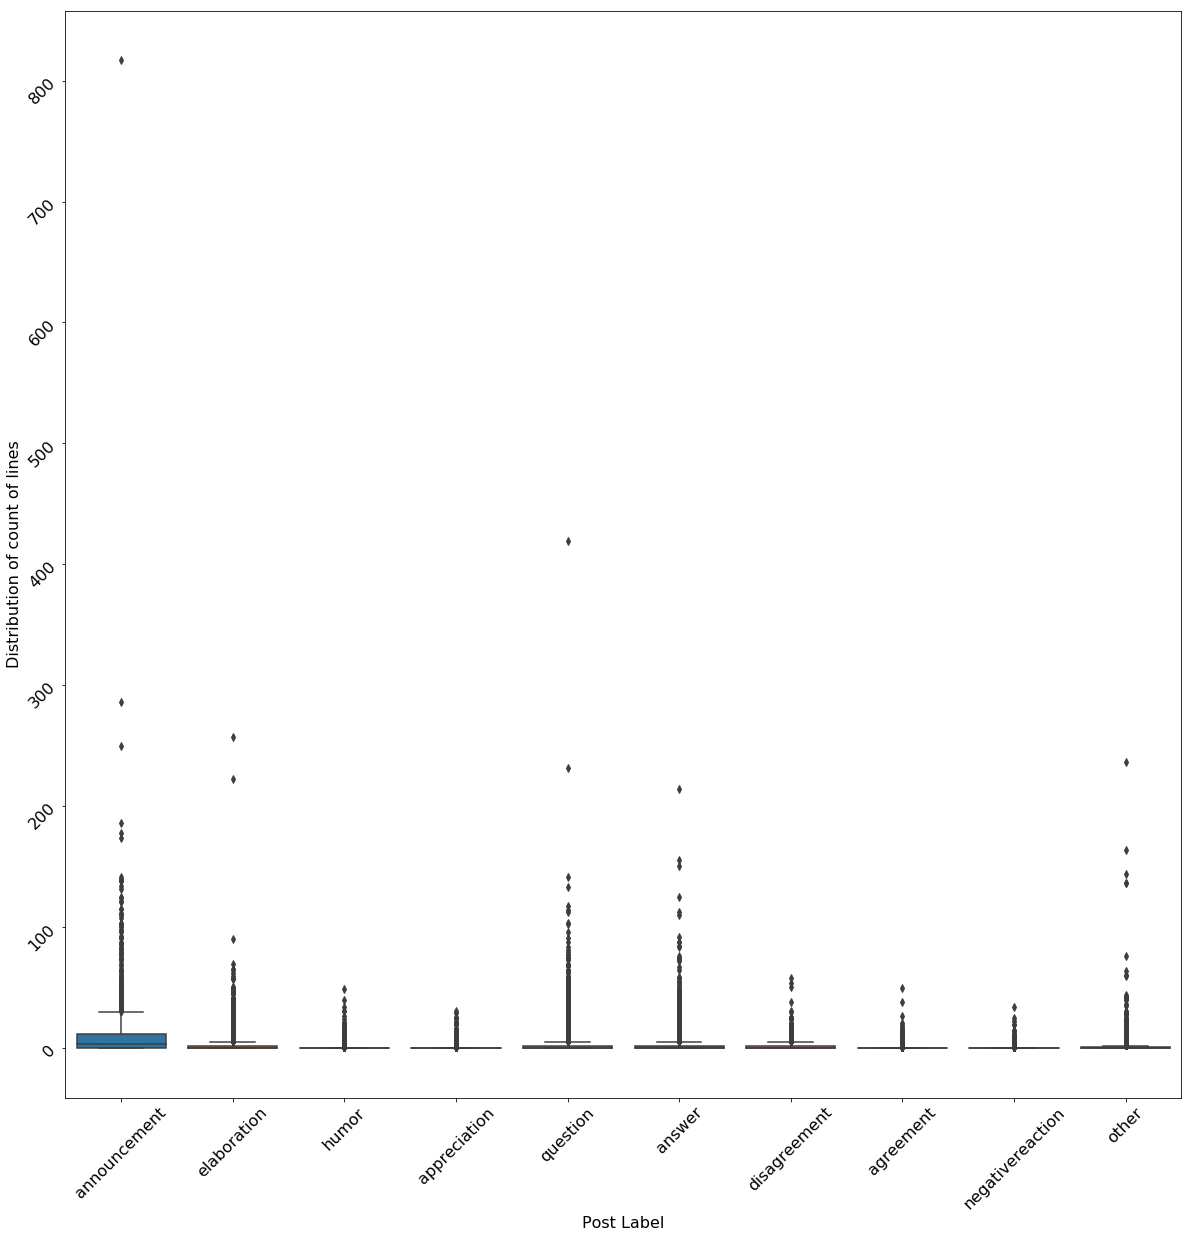

In [35]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x = 'final_label', y = 'count_line', data = reddit_data)
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("Distribution of count of lines", fontsize=16)
ax.tick_params(axis="y", labelsize=16, rotation=45)
ax.tick_params(axis="x", labelsize=16, rotation=45)
plt.show()

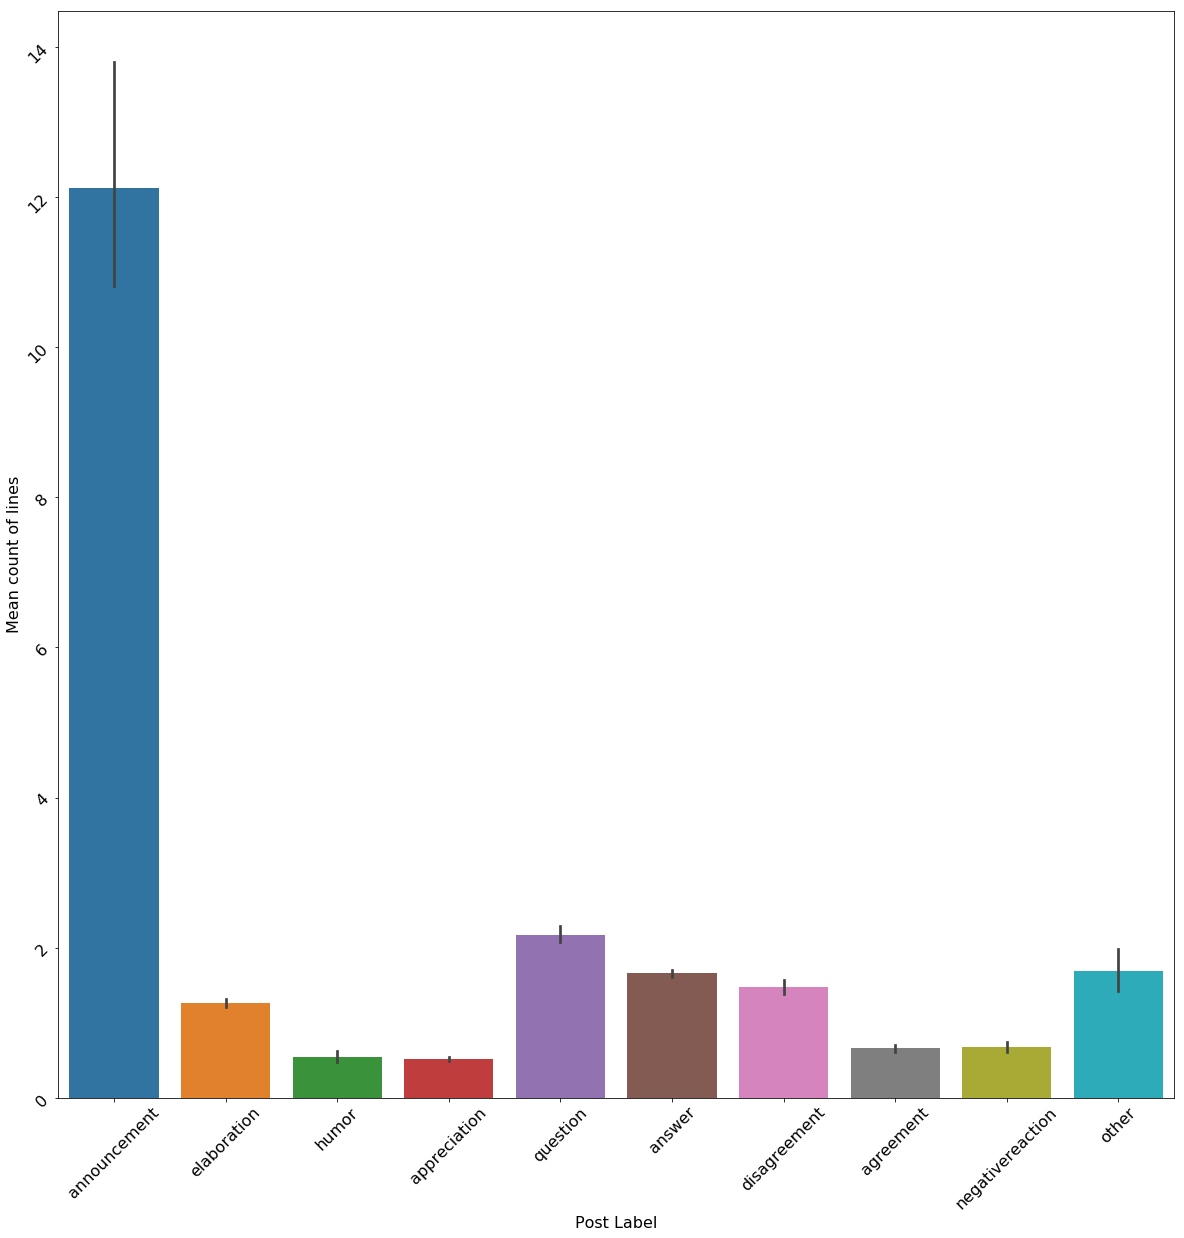

In [36]:
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x = 'final_label', y = 'count_line', data = reddit_data)
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("Mean count of lines", fontsize=16)
ax.tick_params(axis="y", labelsize=16, rotation=45)
ax.tick_params(axis="x", labelsize=16, rotation=45)
plt.show()

We can clearly see that announcement posts have more number of lines than other categories of post

In [37]:
reddit_data['count_exclamation'] = reddit_data['text'].apply(lambda x:str(x).count("!"))

In [38]:
reddit_data.groupby(['final_label'])['count_exclamation'].median()

final_label
agreement           0
announcement        0
answer              0
appreciation        0
disagreement        0
elaboration         0
humor               0
negativereaction    0
other               0
question            0
Name: count_exclamation, dtype: int64

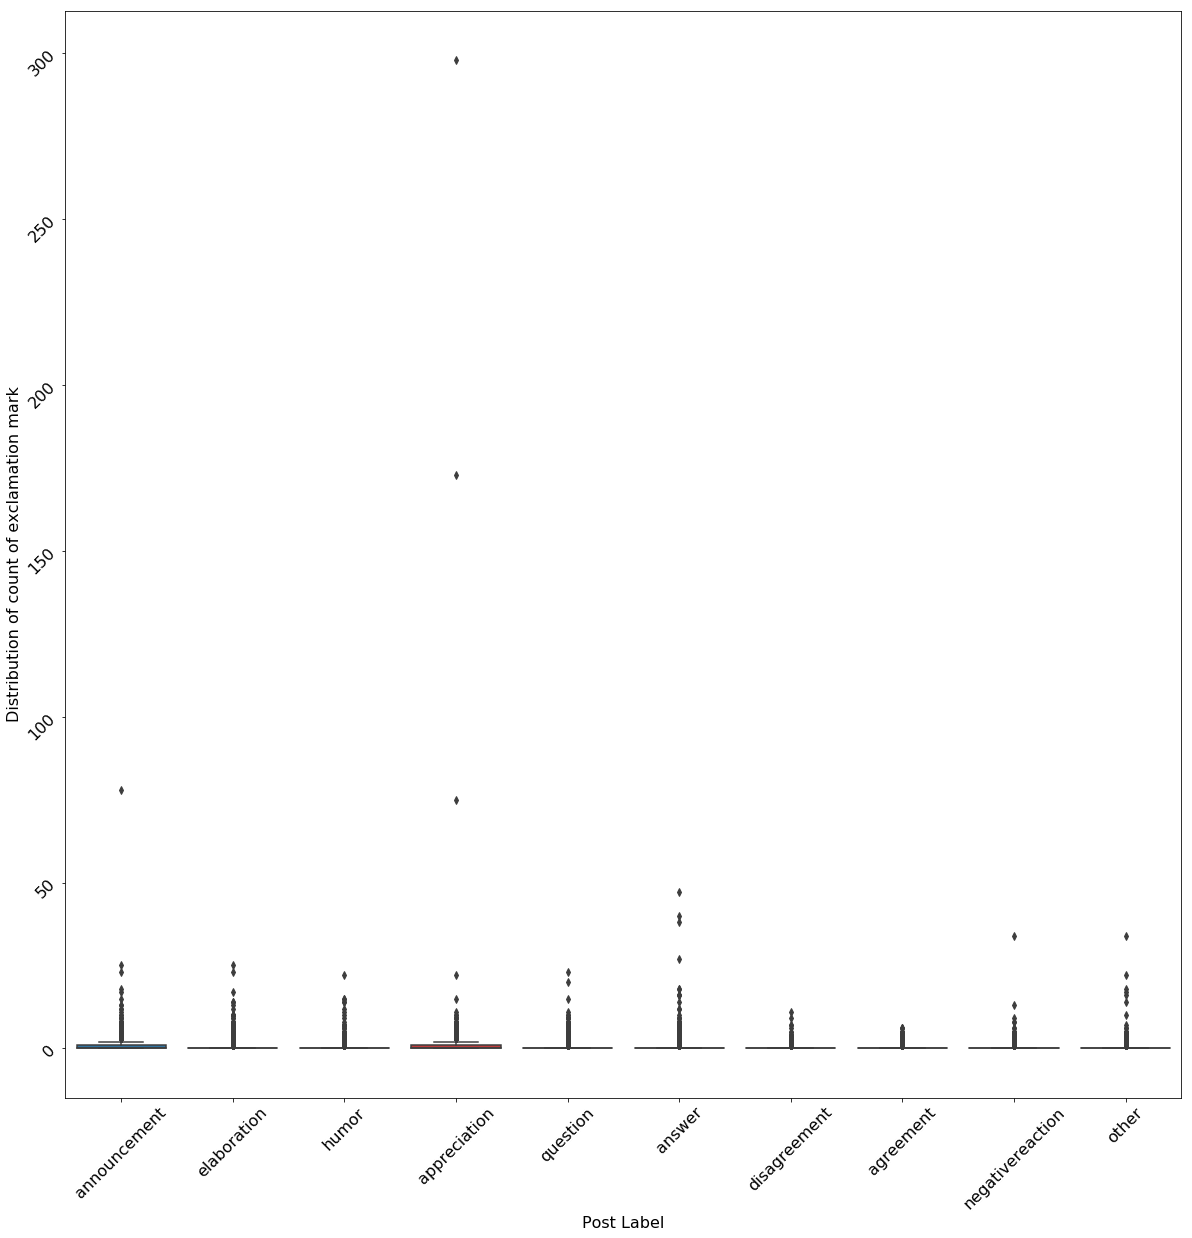

In [39]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x = 'final_label', y = 'count_exclamation', data = reddit_data)
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("Distribution of count of exclamation mark", fontsize=16)
ax.tick_params(axis="y", labelsize=16, rotation=45)
ax.tick_params(axis="x", labelsize=16, rotation=45)
plt.show()

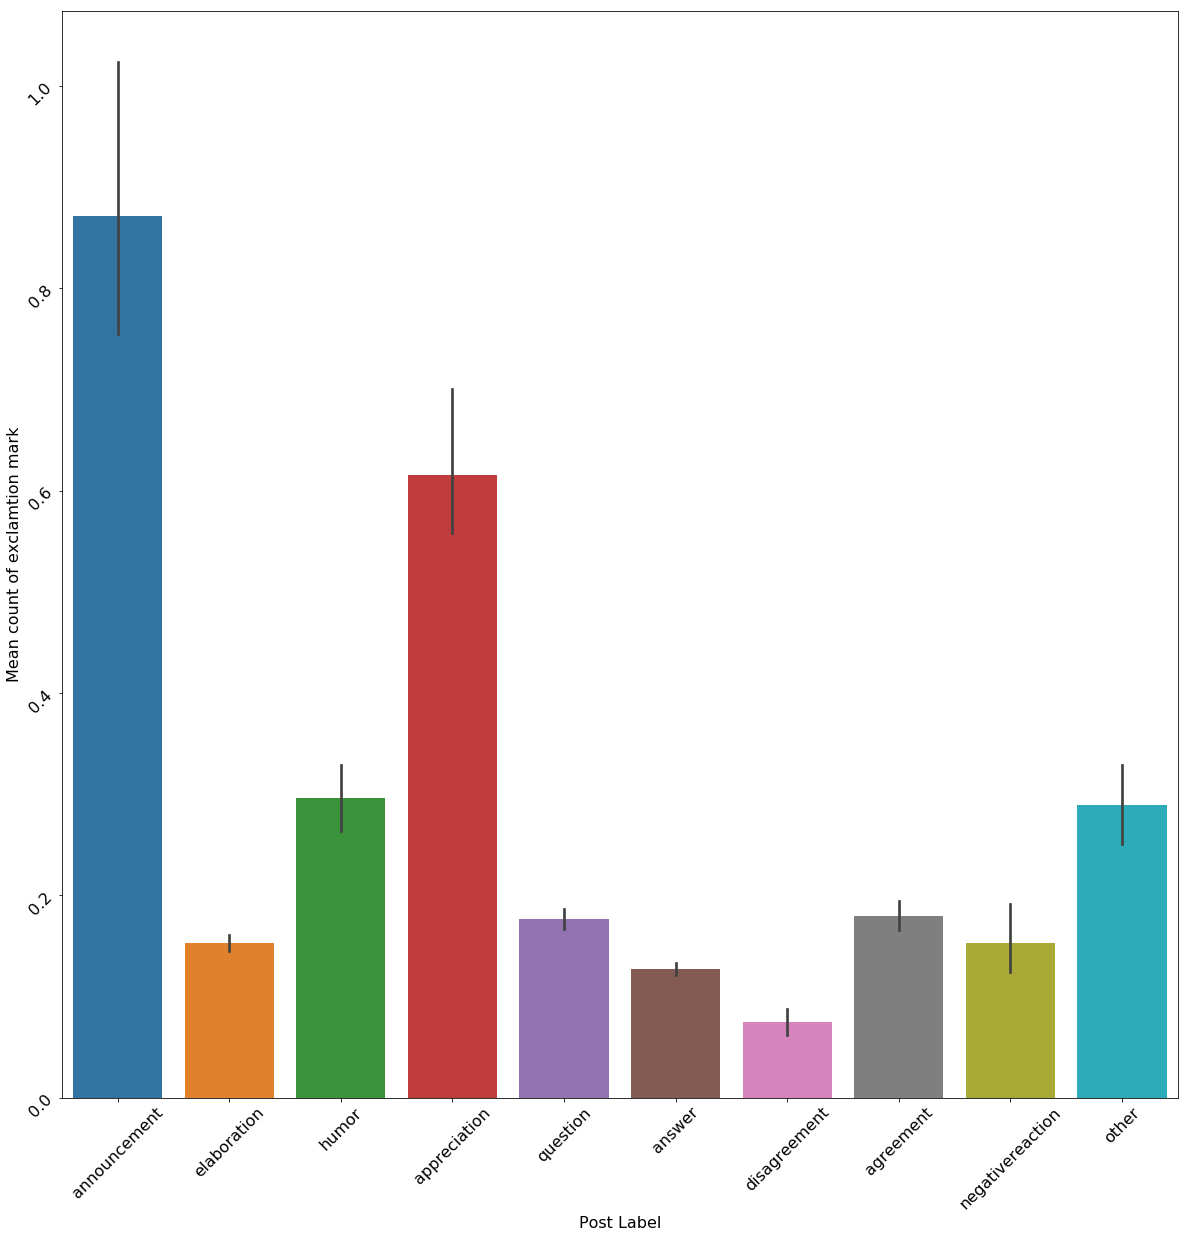

In [40]:
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x = 'final_label', y = 'count_exclamation', data = reddit_data)
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("Mean count of exclamtion mark", fontsize=16)
ax.tick_params(axis="y", labelsize=16, rotation=45)
ax.tick_params(axis="x", labelsize=16, rotation=45)
plt.show()

For announcement and appreciation we have more exclamation marks than others

In [41]:
reddit_data['count_url'] = reddit_data['text'].apply(lambda x:str(x).count("http"))

In [42]:
reddit_data.groupby(['final_label'])['count_url'].median()

final_label
agreement           0
announcement        0
answer              0
appreciation        0
disagreement        0
elaboration         0
humor               0
negativereaction    0
other               0
question            0
Name: count_url, dtype: int64

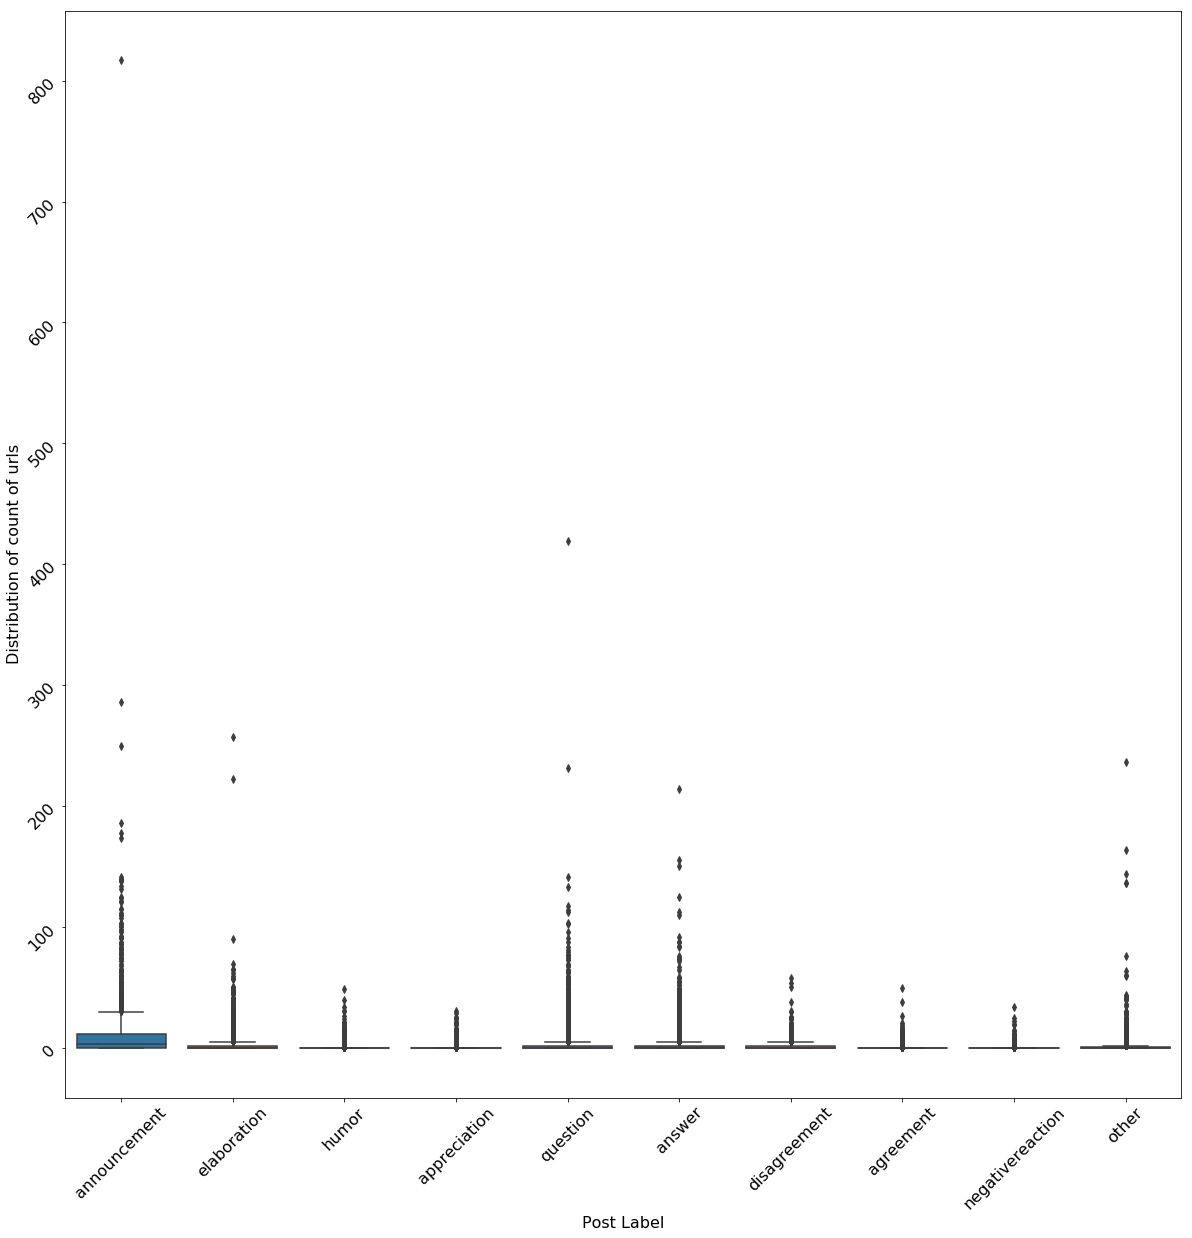

In [43]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x = 'final_label', y = 'count_line', data = reddit_data)
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("Distribution of count of urls", fontsize=16)
ax.tick_params(axis="y", labelsize=16, rotation=45)
ax.tick_params(axis="x", labelsize=16, rotation=45)
plt.show()

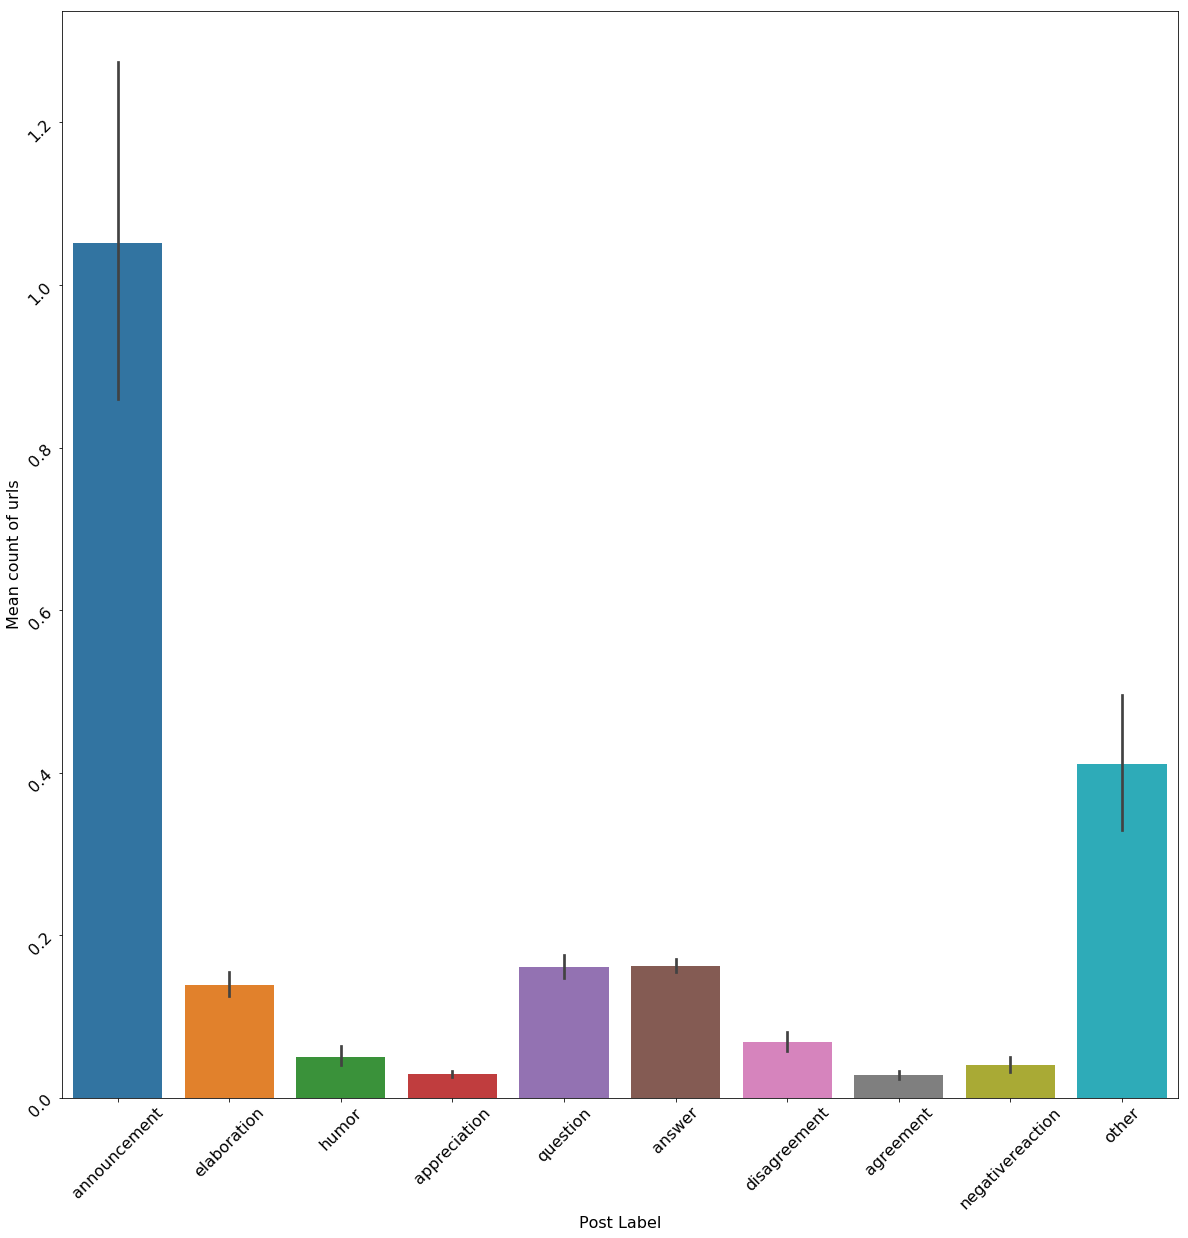

In [44]:
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x = 'final_label', y = 'count_url', data = reddit_data)
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("Mean count of urls", fontsize=16)
ax.tick_params(axis="y", labelsize=16, rotation=45)
ax.tick_params(axis="x", labelsize=16, rotation=45)
plt.show()

In [45]:
reddit_data['text_clean'] = reddit_data['text'].str.replace(re.compile('[^\w\s]'), ' ')
reddit_data['text_clean'] = reddit_data['text'].str.replace(re.compile('\s+'), ' ')

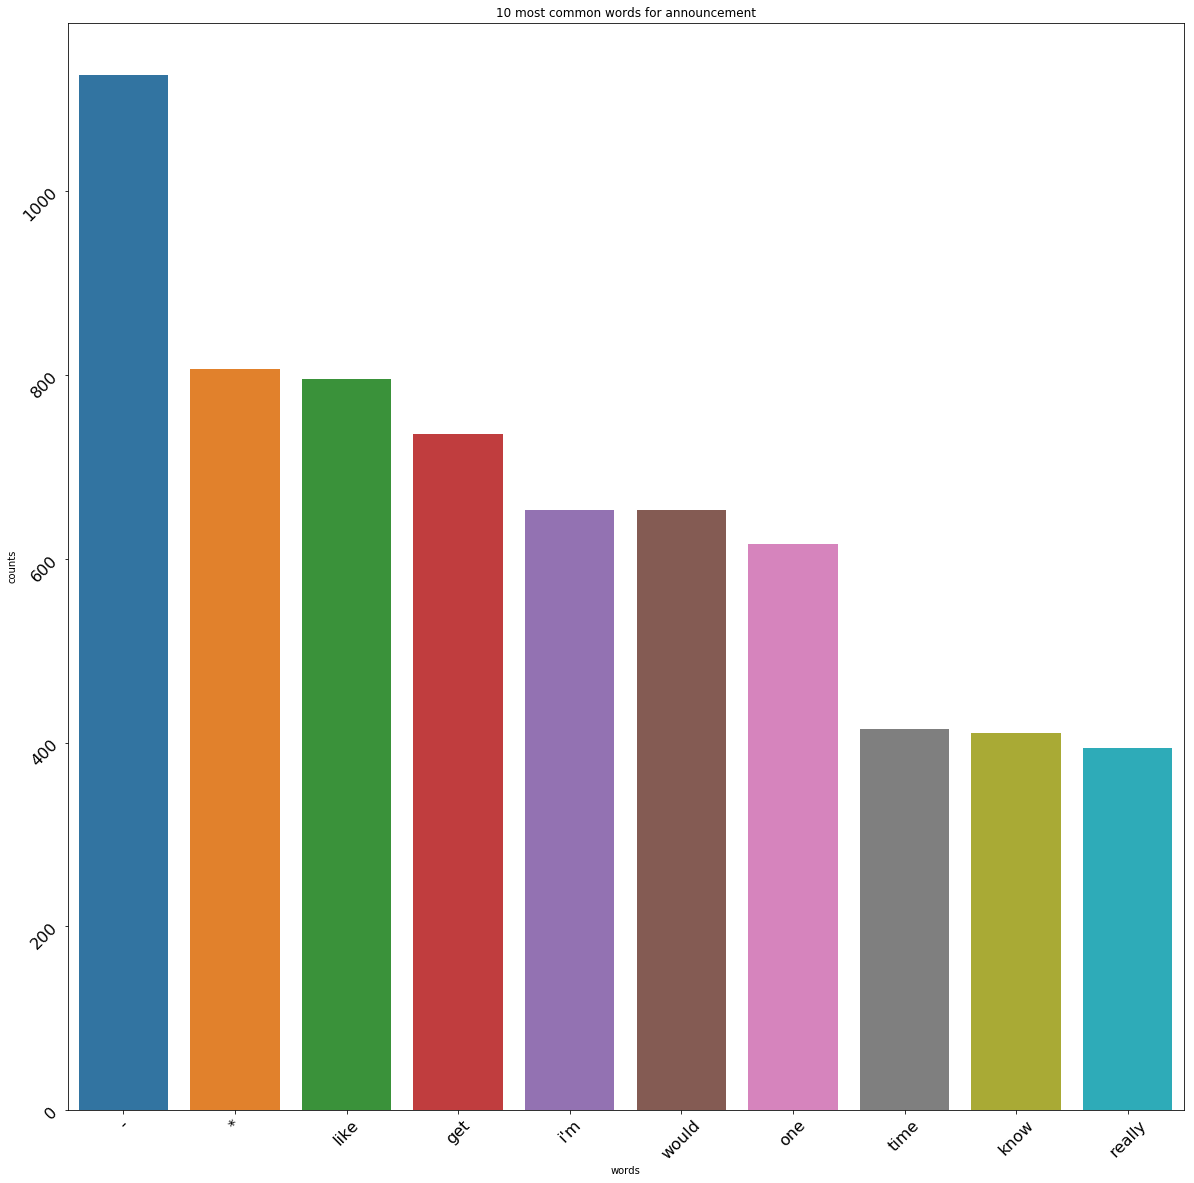

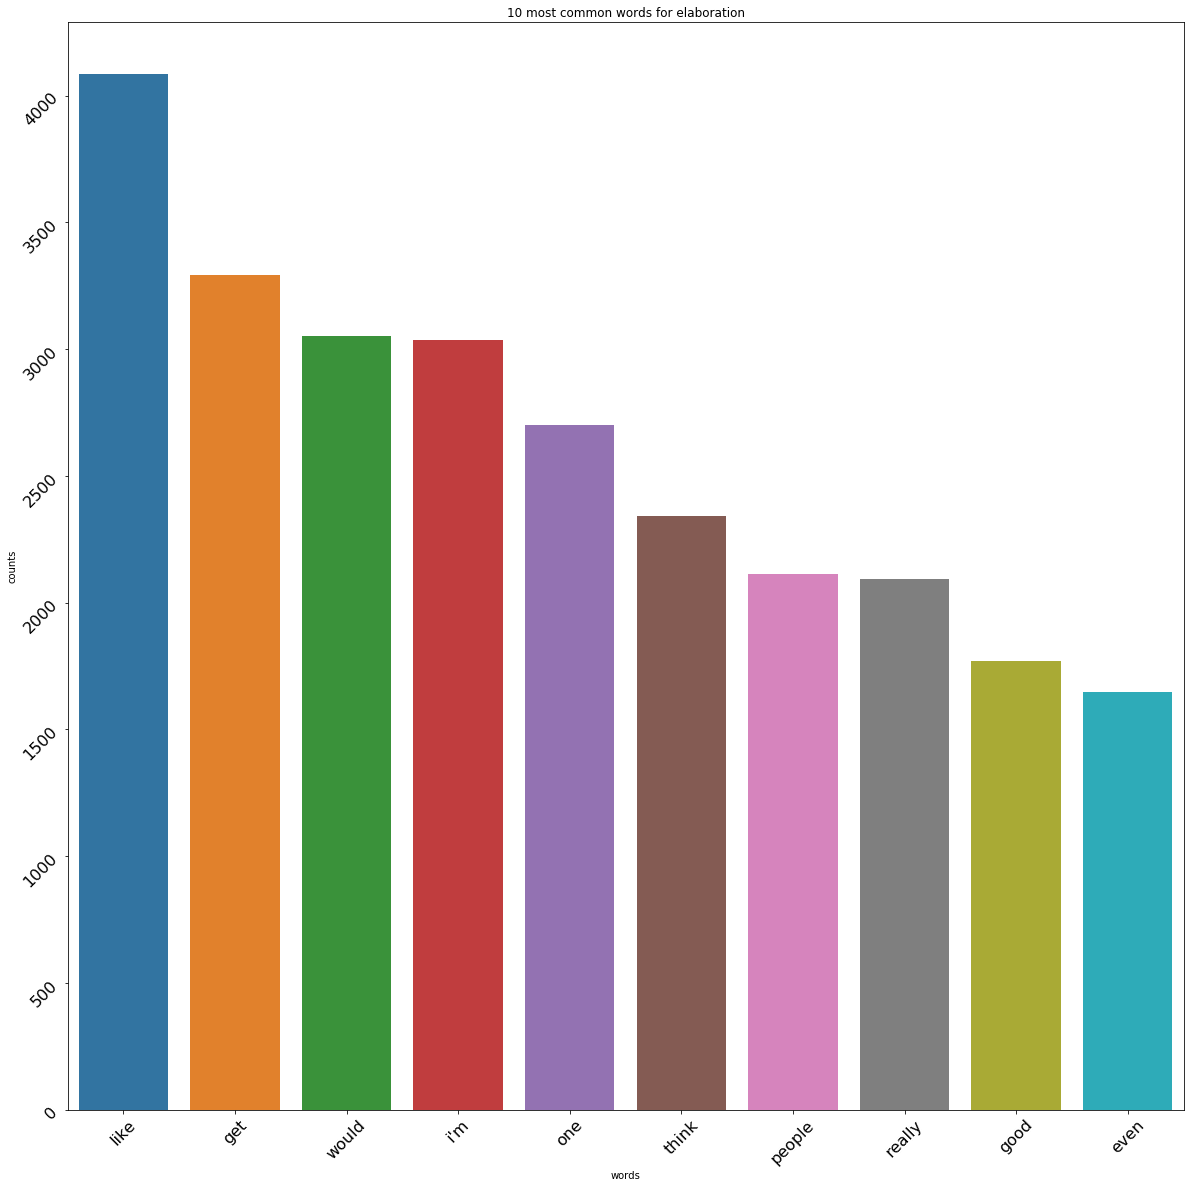

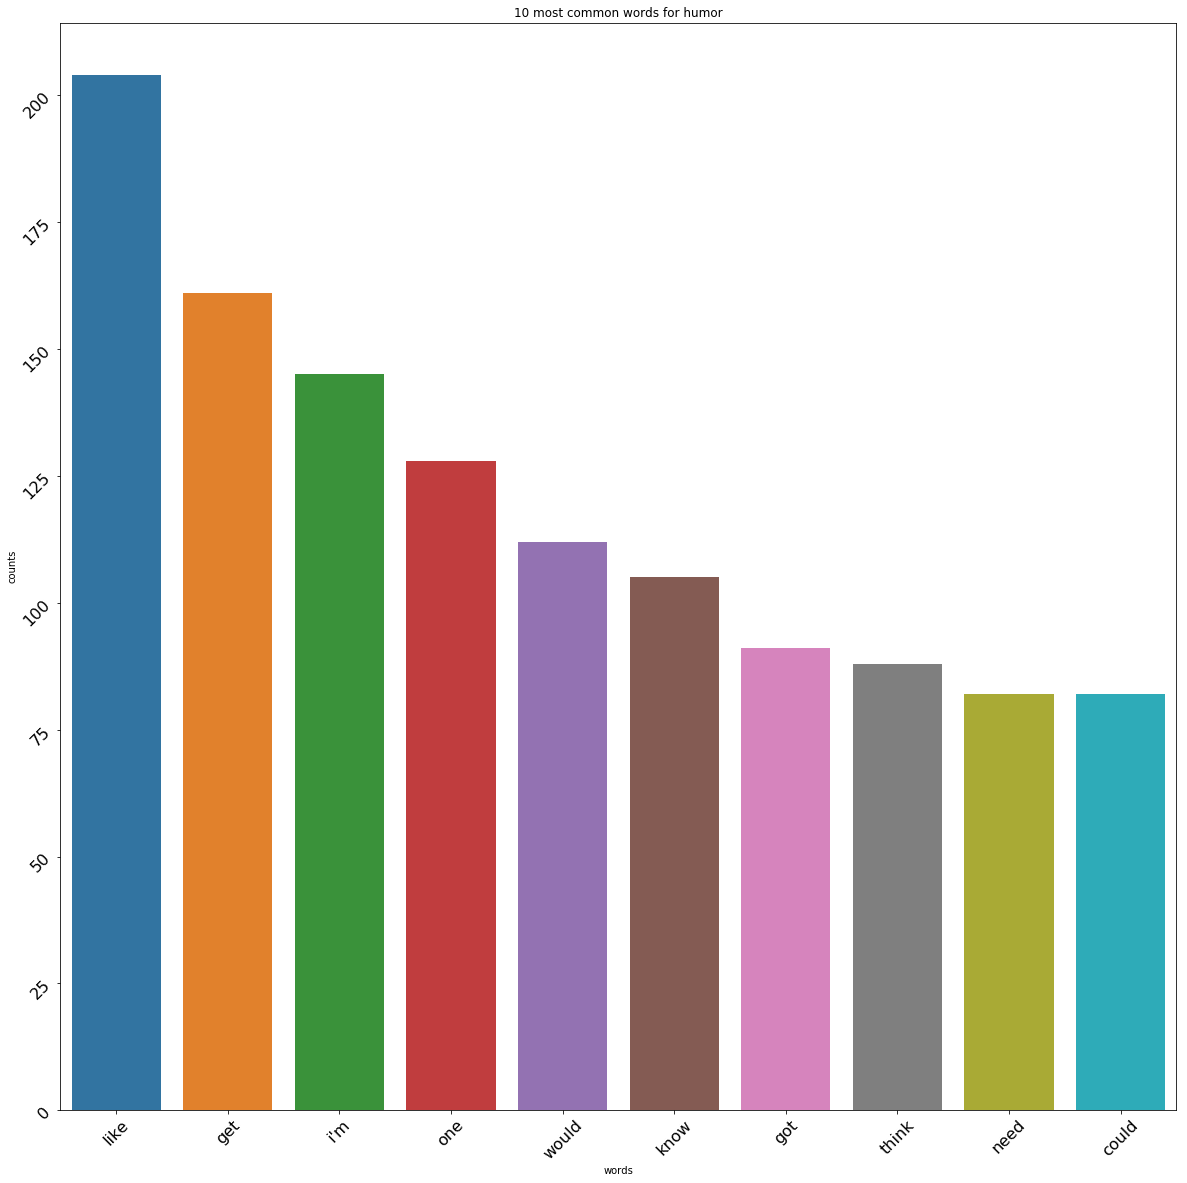

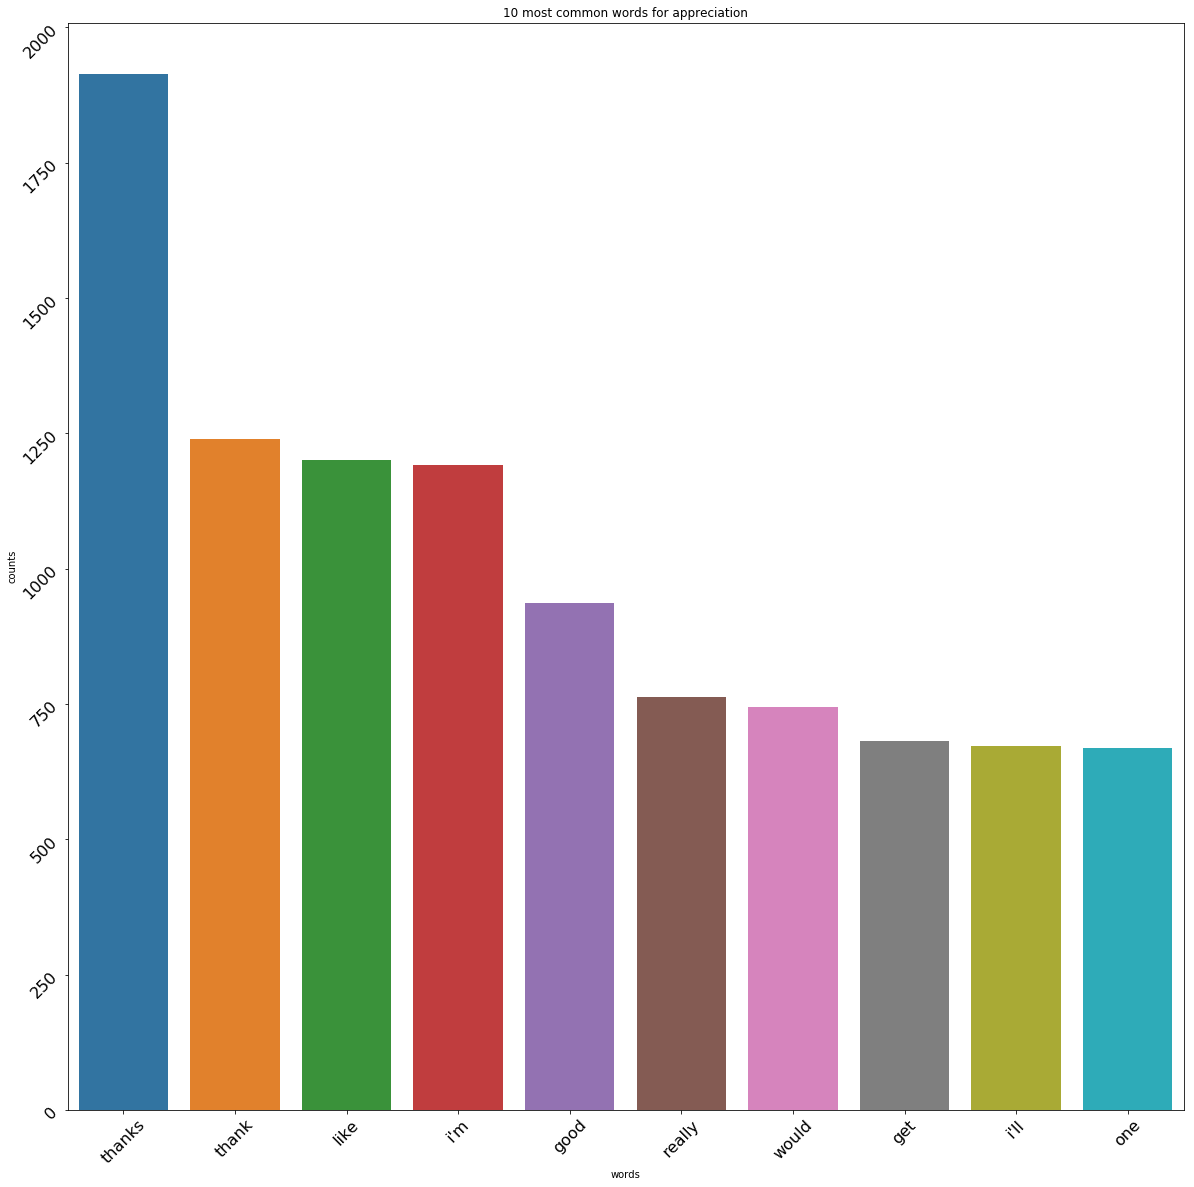

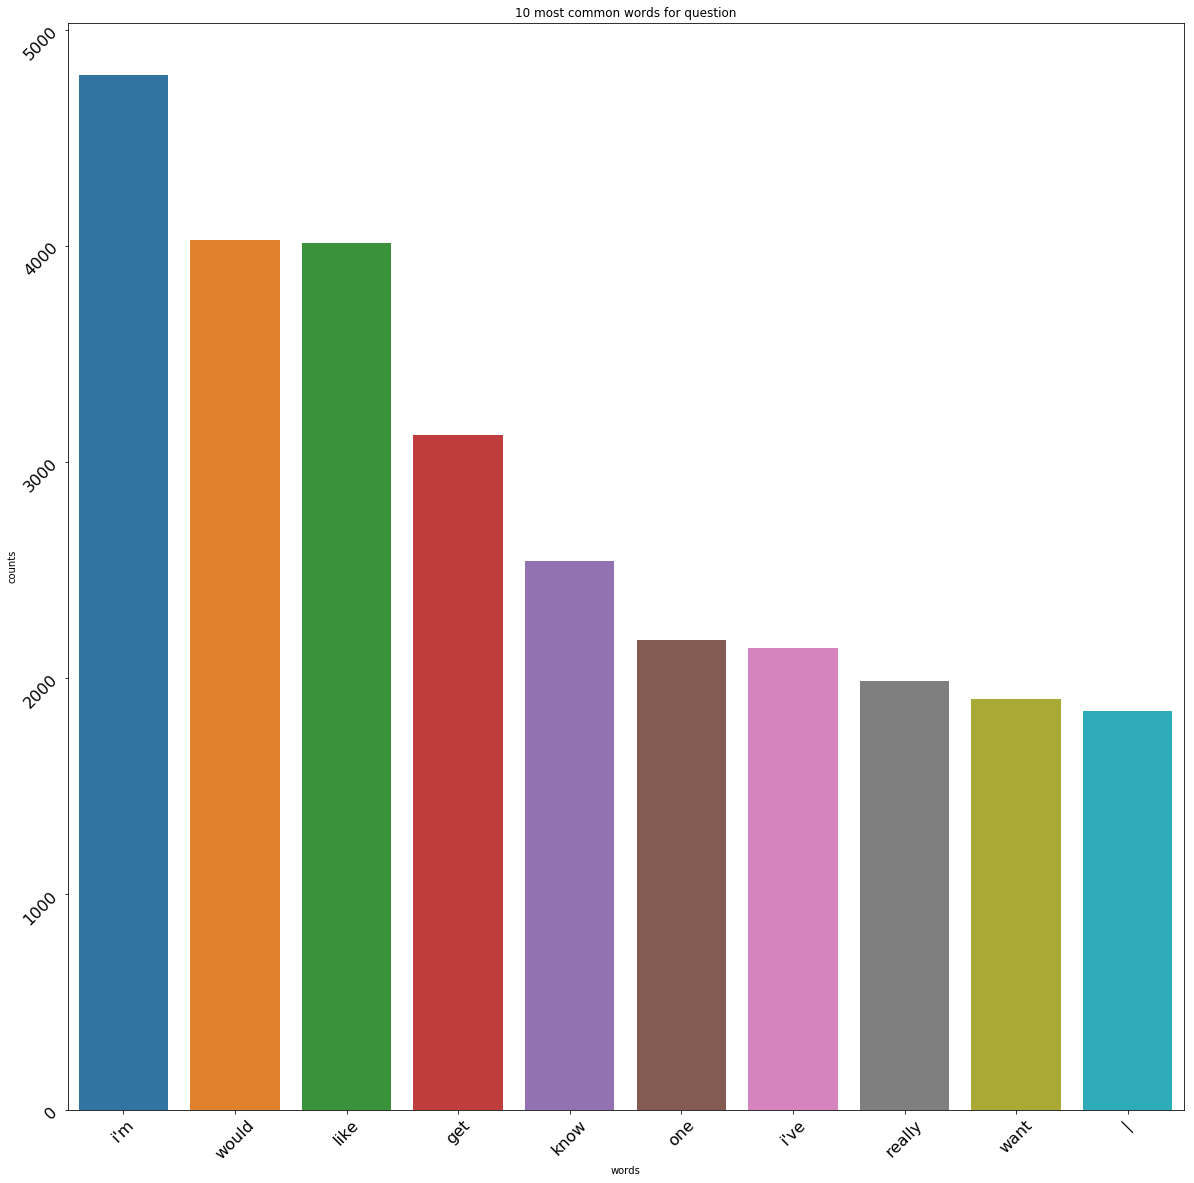

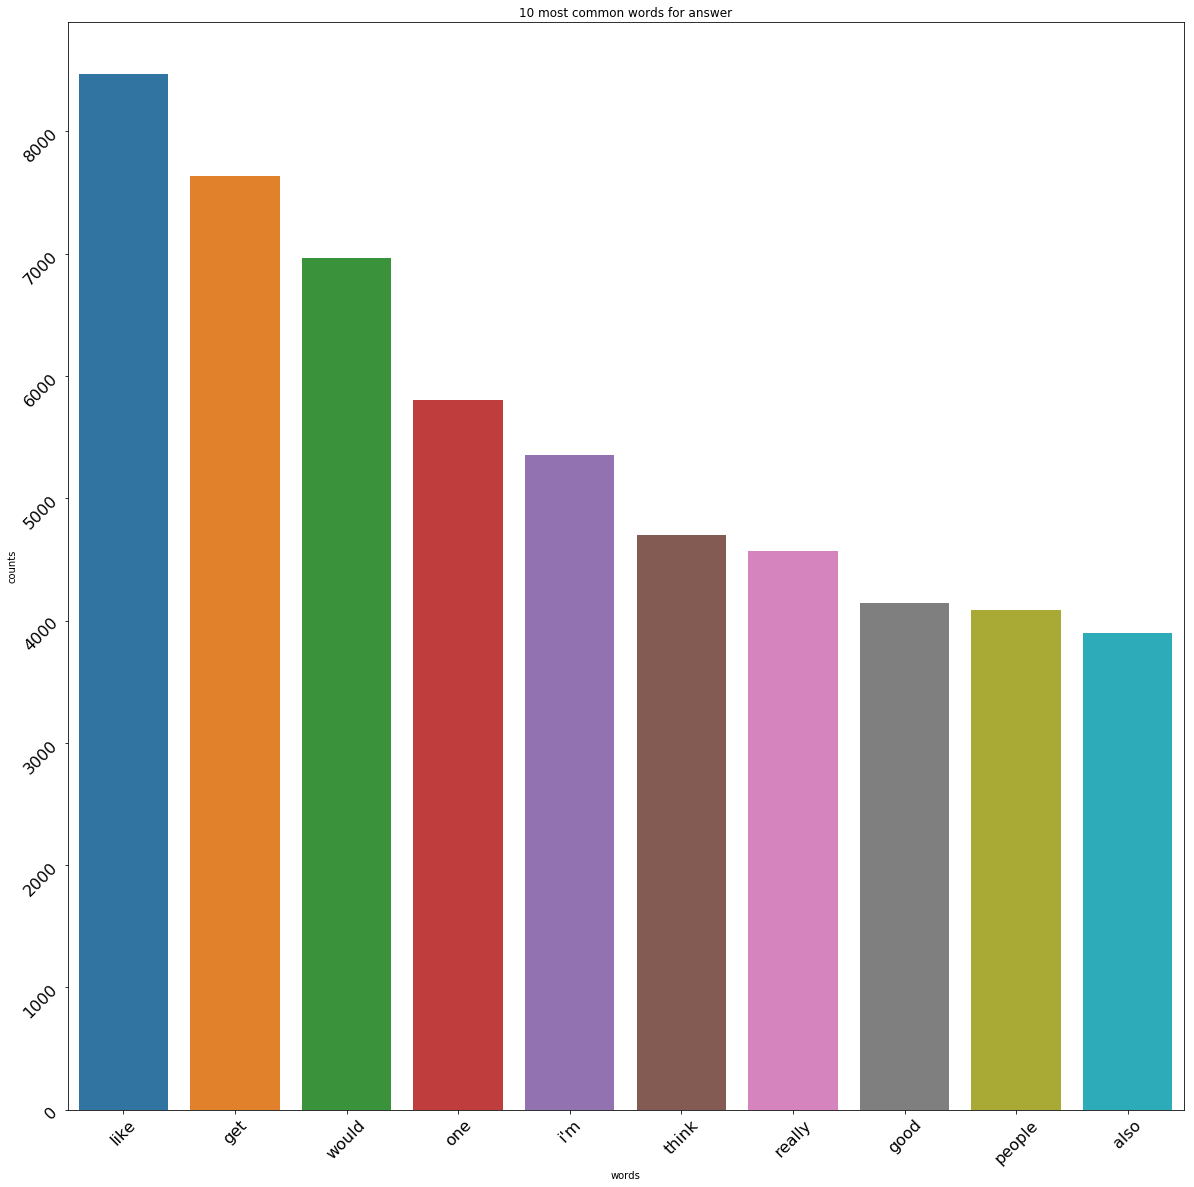

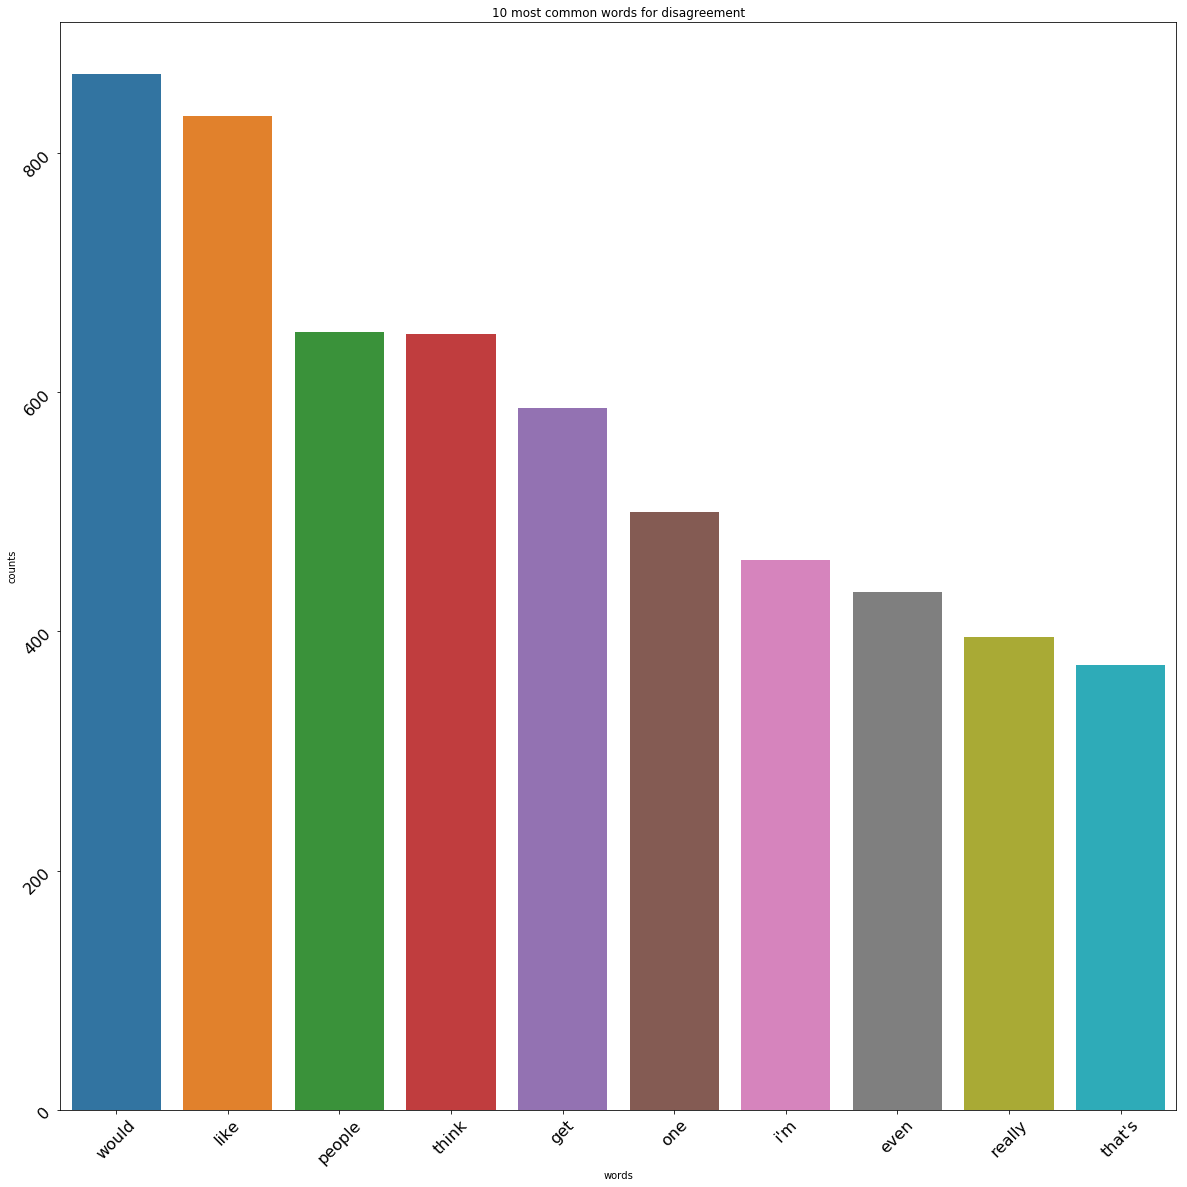

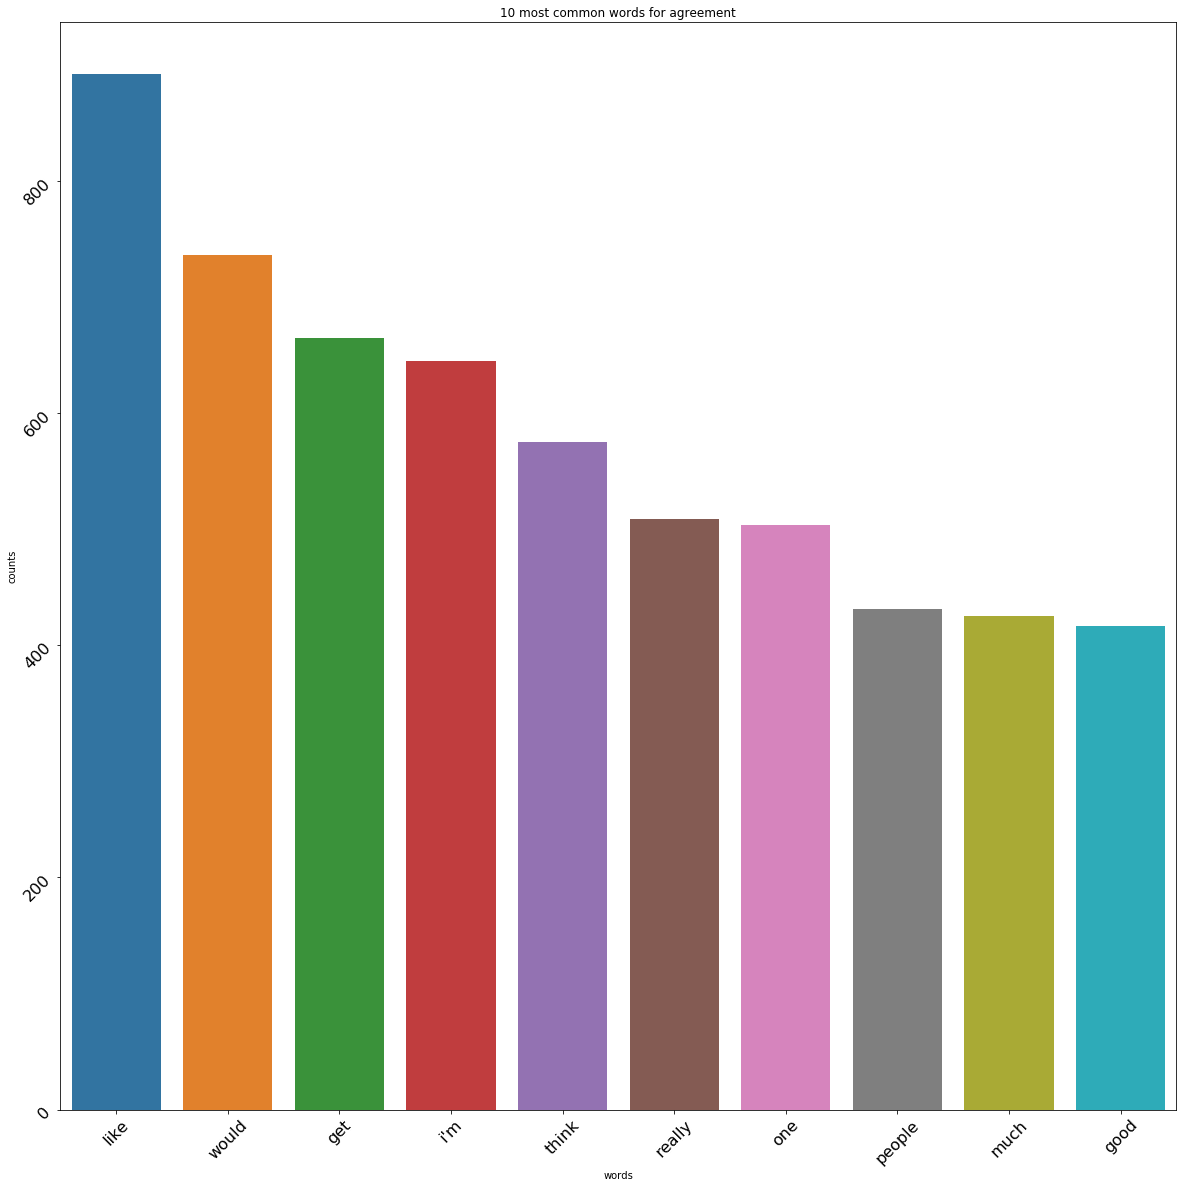

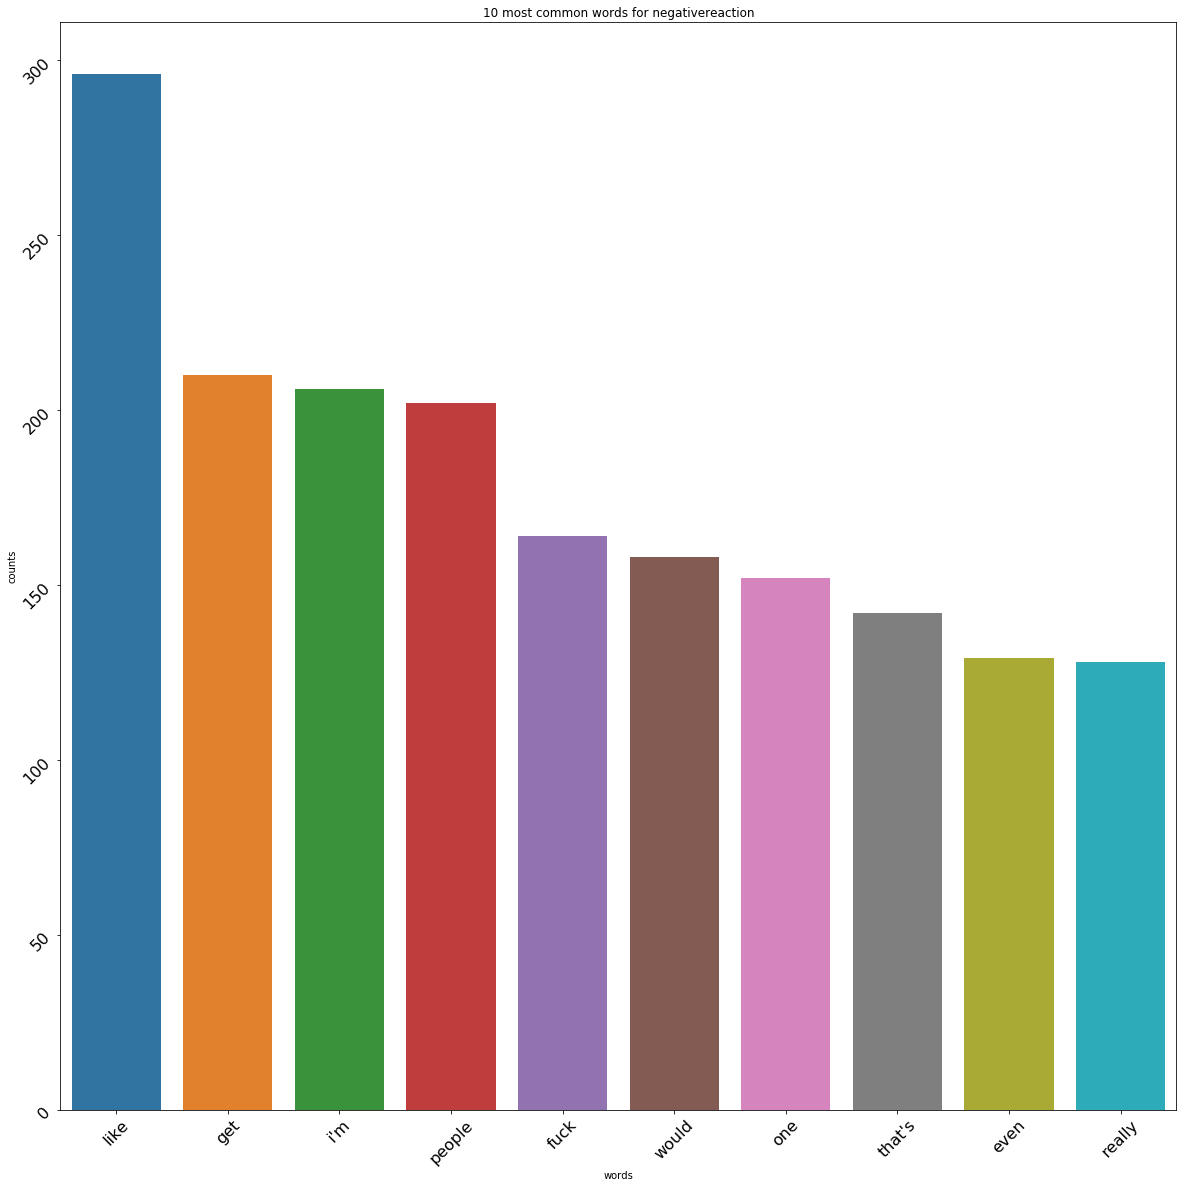

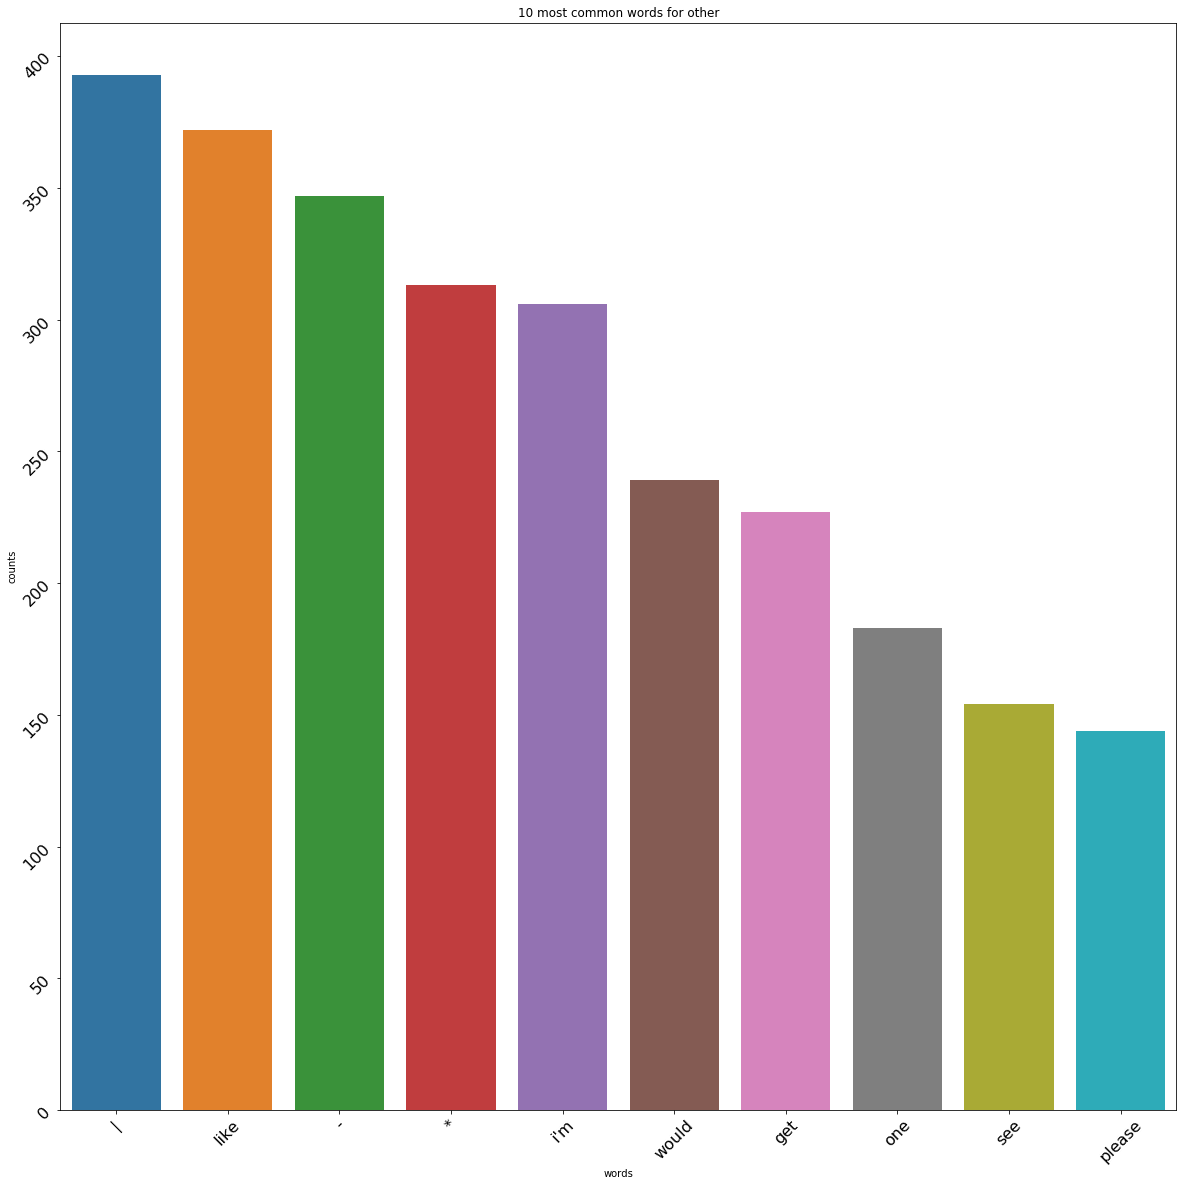

In [46]:
import nltk
from nltk.corpus import stopwords
for label in pd.unique(reddit_data['final_label']):
    unigram_dist = nltk.FreqDist([word for des in reddit_data[reddit_data['final_label']==label]['text_clean'].astype(str).str.lower() for word in des.split(" ") if word != "" and word not in stopwords.words('english')])
    top_10_unigram = pd.DataFrame(unigram_dist.most_common(10), columns = ['words','counts'])
    fig, ax = plt.subplots(figsize=(20,20))
    sns.barplot(x='words',y='counts', data=top_10_unigram)
    ax.tick_params(axis="y", labelsize=16, rotation=45)
    ax.tick_params(axis="x", labelsize=16, rotation=45)
    plt.title("10 most common words for %s" %label)
    plt.show()
    

### Depth column

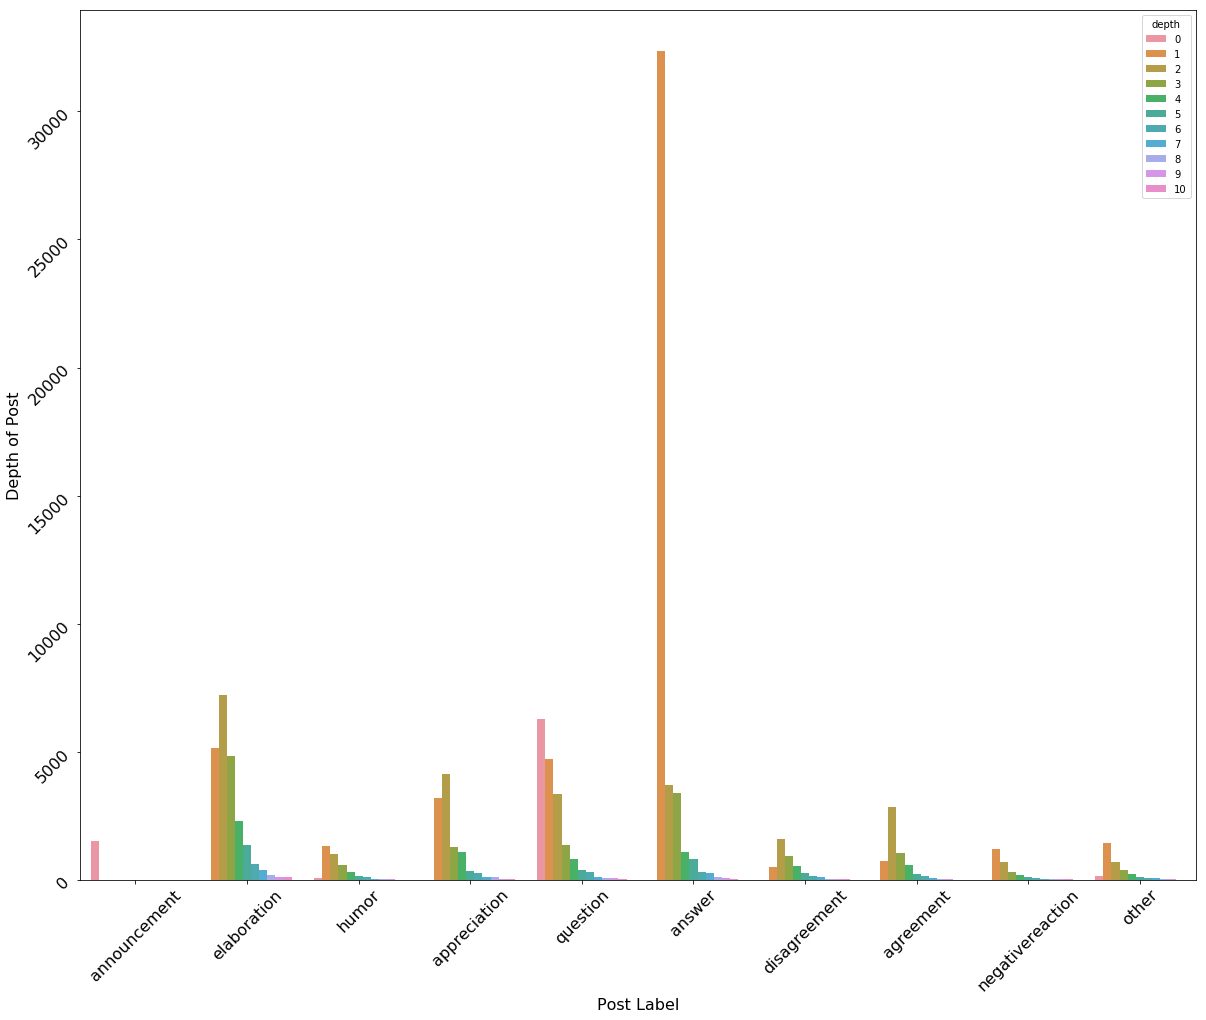

In [47]:
fig, ax = plt.subplots(figsize=(20,16))
sns.countplot(x = 'final_label', hue = 'depth', data = reddit_data)
ax.set_xlabel("Post Label", fontsize=16)
ax.set_ylabel("Depth of Post", fontsize=16)
ax.tick_params(axis="y", labelsize=16, rotation=45)
ax.tick_params(axis="x", labelsize=16, rotation=45)
plt.show()